# Project 4 – Predicting a Continuous Target with Regression (Titanic)

Author: Megan Chastain

Date: 13th November, 2025

#### Introduction: The following is an example using regression to predict a continuous numeric target.  This will be shown by predicting the fare, the amount of money paid for the journey, using features in the Titanic dataset.

In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


## Section 1. Import and Inspect the Data

In [78]:

# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [79]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

## Section 3. Feature Selection and Justification

In [80]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

In [81]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

In [82]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [83]:
# Case 4. class
X4 = titanic[['pclass']]
y4 = titanic['fare']

### Reflection Questions - answer these in your notebook (in a Markdown cell):

Why might these features affect a passenger’s fare: These features deal with a persons status and the amoun of money they may have available to spend.

List all available features: age, family size, class, sex, deck, embark town.

Which other features could improve predictions and why: Embark town and deck could influence fare. Some ports may be more or less expensive than others. And lower decks may be less expensive than upper decks.

How many variables are in your Case 4: 1

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: I chose class because I beleive lower class selection will be less expensive.

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the data

In [84]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [85]:

#We'll use a more concise approach - create each model and immediately call the fit() method. 

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [86]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y1_pred_test))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y1_pred_test))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y1_pred_test))

print("Case 2: Training R²:", r2_score(y2_train, y2_pred_train))
print("Case 2: Test R²:", r2_score(y2_test, y2_pred_test))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y2_pred_test))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y2_pred_test))

print("Case 3: Training R²:", r2_score(y3_train, y3_pred_train))
print("Case 3: Test R²:", r2_score(y3_test, y3_pred_test))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y3_pred_test))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y3_pred_test))

print("Case 4: Training R²:", r2_score(y4_train, y4_pred_train))
print("Case 4: Test R²:", r2_score(y4_test, y4_pred_test))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y4_pred_test))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y4_pred_test))


Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.3005588037487471
Case 4: Test R²: 0.3016017234169923
Case 4: Test RMSE: 31.7873316928033
Case 4: Test MAE: 20.653703671484056


### Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):

1. Compare the train vs test results for each.

Did Case 1 overfit or underfit? Explain: Case 1 is underfit becuase the training results are significantly lower than the test results. The training results being so close to zero is also an indicator that the training data is not being fit well.

Did Case 2 overfit or underfit? Explain: Case 2 is also underfit.

Did Case 3 overfit or underfit? Explain: Case 3 is also underfit.

Did Case 4 overfit or underfit? Explain: Case 4 is neither. the R2 value is insignificantly different between the train and test data.

2. Adding Age

Did adding age improve the model: It did not greatly improve the model.

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): Older individuals my be more established and able to afford a higher fair. However, I am not sure the data supports that.

3. Worst

Which case performed the worst: Case 3

How do you know: The results between the train and test data for the evaluation metrics were the greatest in difference.

Do you think adding more training data would improve it (and why/why not): Yes, that and the data may not fall on a straight line so changing the regression analysis might help.

4. Best

Which case performed the best: Case 4

How do you know: The difference between the evaluation metrics results was the smallest.

Do you think adding more training data would improve it (and why/why not): Yes, it will always help.

## Section 5. Compare Alternative Models

### Choose Best Case to Continue

I am choosing Case 4- Class

### 5.1 Ridge Regression (L2 penalty)

In [87]:
#Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.

#This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

#Penalty term: L2 = sum of squared weights
#Effect: Shrinks weights, helps reduce overfitting, keeps all features

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

print("Ridge Regression: Test RMSE:", root_mean_squared_error(y4_test, y_pred_ridge))
print("Ridge Regression: Test MAE:", mean_absolute_error(y4_test, y_pred_ridge))

Ridge Regression: Test RMSE: 31.77263998896141
Ridge Regression: Test MAE: 20.642499405545284


### 5.2 Elastic Net (L1 + L2 combined)

In [88]:
#Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. 
#Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.

#Penalty term: L1 = sum of absolute values of weights
#Effect: Can shrink some weights to zero (drops features), simplifies the model
#Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.

#We control the balance with a parameter called l1_ratio:

#If l1_ratio = 0, it behaves like Ridge
#If l1_ratio = 1, it behaves like Lasso
#Values in between mix both types
#Penalty term: α × (L1 + L2)
#Effect: Shrinks weights and can drop some features — flexible and powerful

elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

print("Elastic Net: Test RMSE:", root_mean_squared_error(y4_test, y_pred_elastic))
print("Elastic Net: Test MAE:", mean_absolute_error(y4_test, y_pred_elastic))

Elastic Net: Test RMSE: 30.924081298775285
Elastic Net: Test MAE: 19.925521818892264


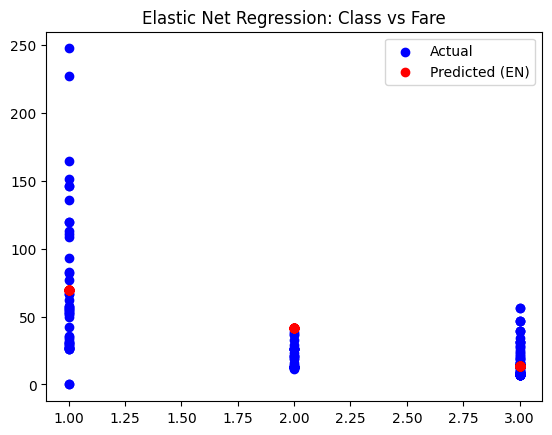

In [98]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_elastic, color='red', label='Predicted (EN)')
plt.legend()
plt.title("Elastic Net Regression: Class vs Fare")
plt.show()

### 5.3 Polynomial Regression

In [89]:
#Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. 
#Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

In [90]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

print("Poly Regression: Test RMSE:", root_mean_squared_error(y4_test, y_pred_poly))
print("Poly Regression: Test MAE:", mean_absolute_error(y4_test,y_pred_poly))

Poly Regression: Test RMSE: 30.992222956832812
Poly Regression: Test MAE: 19.248370731275575


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

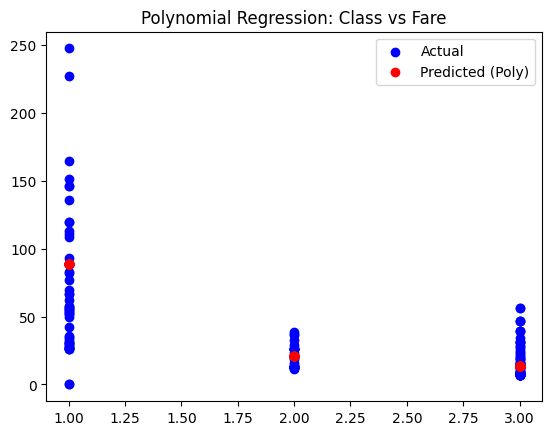

In [91]:
plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Class vs Fare")
plt.show()

### 5.4 Reflections (in a Markdown cell):

What patterns does the cubic model seem to capture:

Where does it perform well or poorly: It does decently, fits the middle of the data.

Did the polynomial fit outperform linear regression: Yes.

Where (on the graph or among which kinds of data points) does it fit best: It fits the median data.

### 5.4 Compare All Models

In [94]:
#Create a summary table or printout comparing all models:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y4_pred_test)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.302
Linear RMSE: 31.79
Linear MAE: 20.65

Ridge R²: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: 0.336
Polynomial RMSE: 30.99
Polynomial MAE: 19.25



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

Poly Regression: Test RMSE: 30.99222295683232
Poly Regression: Test MAE: 19.248370731275365


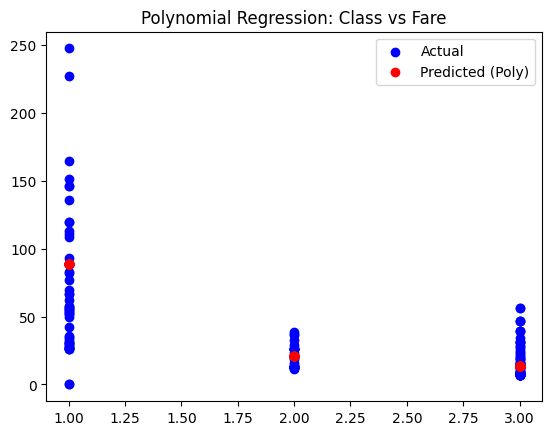

In [95]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_polyB = poly_model.predict(X4_test_poly)

print("Poly Regression: Test RMSE:", root_mean_squared_error(y4_test, y_pred_polyB))
print("Poly Regression: Test MAE:", mean_absolute_error(y4_test,y_pred_polyB))

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_polyB, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Class vs Fare")
plt.show()

Poly Regression: Test RMSE: 30.99222295683093
Poly Regression: Test MAE: 19.248370731274647


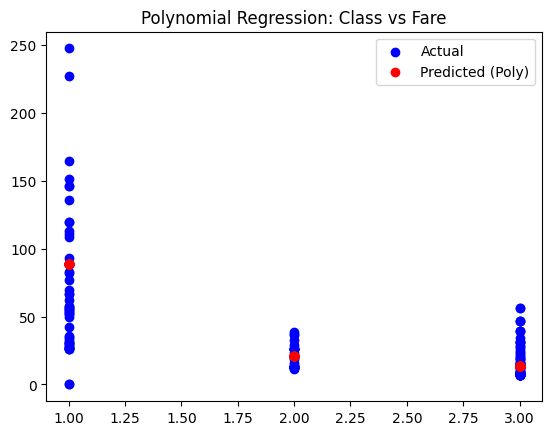

In [97]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=9)
X_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_polyC = poly_model.predict(X4_test_poly)

print("Poly Regression: Test RMSE:", root_mean_squared_error(y4_test, y_pred_polyC))
print("Poly Regression: Test MAE:", mean_absolute_error(y4_test,y_pred_polyC))

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_polyC, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Class vs Fare")
plt.show()

### Comparison

The results were the same as the degree changed.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

1. What features were most useful? Class was the most useful out of the features tested.

2. What regression model performed best? Elastic Net performed the best with the class feature.

3. How did model complexity or regularization affect results? Some data can be fit with simple models and some cannot because the data doesn't fall on a straight line. With the class data the poly did out perform the linear regression.

### 6.2 Discuss Challenges

1. Was fare hard to predict? Why? It wasn't with the class feature, but would have been with the age feature. 

2. Did skew or outliers impact the models? Skew may have impacted the models but with class I don't think there were enought outliers to impact them.